# Sri Lanka Food Price Inflation Analysis (2001–2025)

This project analyzes long-term food price inflation trends in Sri Lanka using monthly data from 2001 to 2025 to understand cost-of-living changes and economic instability.

Data source: International food price inflation dataset (monthly observations).

# Data Cleaning

In [1]:
import pandas as pd

df = pd.read_csv("../data/food_price_inflation.csv")
df.head()

,REF_AREA,REF_AREA_LABEL,TIME_PERIOD,OBS_VALUE
0,AFG,Afghanistan,2001-01-01,22.943765
1,AFG,Afghanistan,2001-02-01,24.357903
2,AFG,Afghanistan,2001-03-01,21.202933
3,AFG,Afghanistan,2001-04-01,17.301832
4,AFG,Afghanistan,2001-05-01,9.334624


# Inspect The Structure

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59839 entries, 0 to 59838
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REF_AREA        59839 non-null  object 
 1   REF_AREA_LABEL  59839 non-null  object 
 2   TIME_PERIOD     59839 non-null  object 
 3   OBS_VALUE       59839 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.8+ MB


In [3]:
df.columns

Index(['REF_AREA', 'REF_AREA_LABEL', 'TIME_PERIOD', 'OBS_VALUE'], dtype='object')

# Looking for null values

In [5]:
df.isnull().sum()

REF_AREA          0
REF_AREA_LABEL    0
TIME_PERIOD       0
OBS_VALUE         0
dtype: int64

# Filter Sri Lanka from the Data Set(REF_AREA_LABEL) 

In [6]:
df_sl = df[df['REF_AREA_LABEL'] == 'Sri Lanka']

In [8]:
df_sl

,REF_AREA,REF_AREA_LABEL,TIME_PERIOD,OBS_VALUE
50957,LKA,Sri Lanka,2001-01-01,20.325061
50958,LKA,Sri Lanka,2001-02-01,20.897738
50959,LKA,Sri Lanka,2001-03-01,16.556287
50960,LKA,Sri Lanka,2001-04-01,17.395761
50961,LKA,Sri Lanka,2001-05-01,20.435617
...,...,...,...,...
51246,LKA,Sri Lanka,2025-02-01,-1.127349
51247,LKA,Sri Lanka,2025-03-01,0.767918
51248,LKA,Sri Lanka,2025-04-01,2.899178
51249,LKA,Sri Lanka,2025-05-01,5.851298


# Drop the null values

In [9]:
df_sl = df_sl.dropna()

# sort by TIME_PERIOD

In [10]:
df_sl = df_sl.sort_values(by='TIME_PERIOD')

In [11]:
df_sl

,REF_AREA,REF_AREA_LABEL,TIME_PERIOD,OBS_VALUE
50957,LKA,Sri Lanka,2001-01-01,20.325061
50958,LKA,Sri Lanka,2001-02-01,20.897738
50959,LKA,Sri Lanka,2001-03-01,16.556287
50960,LKA,Sri Lanka,2001-04-01,17.395761
50961,LKA,Sri Lanka,2001-05-01,20.435617
...,...,...,...,...
51246,LKA,Sri Lanka,2025-02-01,-1.127349
51247,LKA,Sri Lanka,2025-03-01,0.767918
51248,LKA,Sri Lanka,2025-04-01,2.899178
51249,LKA,Sri Lanka,2025-05-01,5.851298


# Convert TIME_PERIOD to datetime

In [12]:
df_sl['TIME_PERIOD'] = pd.to_datetime(df_sl['TIME_PERIOD'])

# rename columns for readability

In [13]:
df_sl = df_sl.rename(columns={
    'TIME_PERIOD': 'date',
    'OBS_VALUE': 'food_inflation'
})

In [14]:
df_sl.head()

,REF_AREA,REF_AREA_LABEL,date,food_inflation
50957,LKA,Sri Lanka,2001-01-01,20.325061
50958,LKA,Sri Lanka,2001-02-01,20.897738
50959,LKA,Sri Lanka,2001-03-01,16.556287
50960,LKA,Sri Lanka,2001-04-01,17.395761
50961,LKA,Sri Lanka,2001-05-01,20.435617


# SAVE CLEAN DATA

In [15]:
df_sl.to_csv("../data/clean_food_inflation_sl.csv", index=False)

# Exploratory Data Analysis

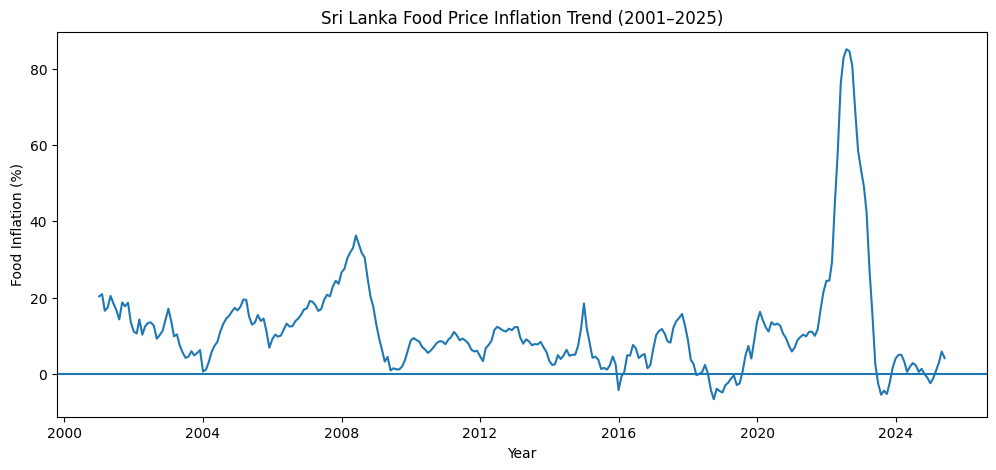

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df_sl['date'], df_sl['food_inflation'])
plt.title("Sri Lanka Food Price Inflation Trend (2001–2025)")
plt.xlabel("Year")
plt.ylabel("Food Inflation (%)")
plt.axhline(0)  # zero inflation line
plt.savefig("../outputs/food_inflation_trend_1.png")
plt.show()

## Key Analysis

- Sri Lanka's food price inflation remained relatively stable between 2001 and 2019, mostly fluctuating between 5% and 20%.
- A sharp and unprecedented spike occurred during 2022–2023, with food inflation peaking above 80%, coinciding with the national economic crisis.
- Periods of negative inflation were observed around 2018–2019 and late 2023, indicating short-term deflation in food prices.
- Post-2020 inflation trends show significantly higher volatility compared to previous decades, highlighting increased economic instability.


# YEARLY AVERAGE ANALYSIS

## extract year

In [18]:
df_sl['year'] = df_sl['date'].dt.year

## calculate yearly average food inflation

In [19]:
yearly_avg = df_sl.groupby('year')['food_inflation'].mean()

yearly_avg.head()

year
2001    17.808504
2002    11.916709
2003     7.947188
2004     9.486068
2005    14.708518
Name: food_inflation, dtype: float64

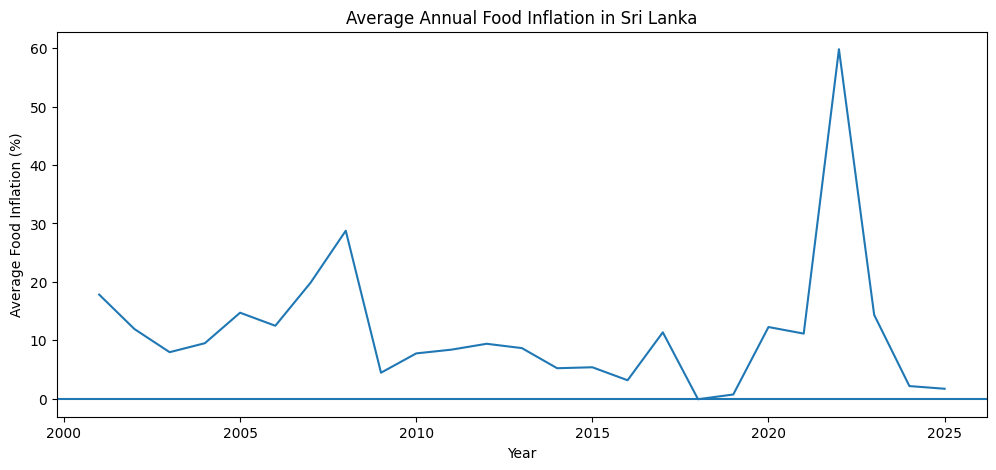

In [23]:
plt.figure(figsize=(12,5))
plt.plot(yearly_avg.index, yearly_avg.values)
plt.title("Average Annual Food Inflation in Sri Lanka")
plt.xlabel("Year")
plt.ylabel("Average Food Inflation (%)")
plt.axhline(0)
plt.savefig("../outputs/food_inflation_trend_2.png")
plt.show()

## Yearly Trend Analysis

- From 2001 to 2019, average annual food inflation in Sri Lanka remained relatively stable, mostly below 15%.
- A sharp increase occurred in 2022, where food inflation peaked at nearly 60%, reflecting severe economic and supply-side shocks.
- Following the peak, inflation declined rapidly in 2023–2025, indicating easing price pressures and partial economic recovery.
- The 2022 spike clearly stands out as an outlier compared to historical trends.


## Conclusion

This analysis shows that Sri Lanka experienced relatively stable food price inflation for nearly two decades, followed by extreme volatility during the 2021–2023 economic crisis. The unprecedented inflation spike in 2022 highlights the vulnerability of food prices to macroeconomic shocks. Recent trends suggest easing inflation, though continued monitoring remains essential for policymakers and businesses.
